# First algorithm implementation using scikit learn library 

I will try to implement a common algorithm to start to play with this kind of implementation using these common libraries. 
Not really having that much attention to right procedures and other things alike. In that sense, just for study and practice purpose.
<p> Therefore, I will use a common library regarding boston data about houses prices, criminality and so on. </p>

### Importing packages 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

### Brief descriptive statistical analysis 

In [5]:
boston_prices = load_boston()

In [7]:
# Dataframe containg the possible independent variables for the possible model
X = pd.DataFrame(boston_prices.data, columns = boston_prices.feature_names)

In [8]:
# Array containing the data of the dependent variable
Y = boston_prices.target

In [12]:
print(X.shape)
print(Y.shape)
X.head()

(506, 13)
(506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
print(boston_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<function matplotlib.pyplot.show(close=None, block=None)>

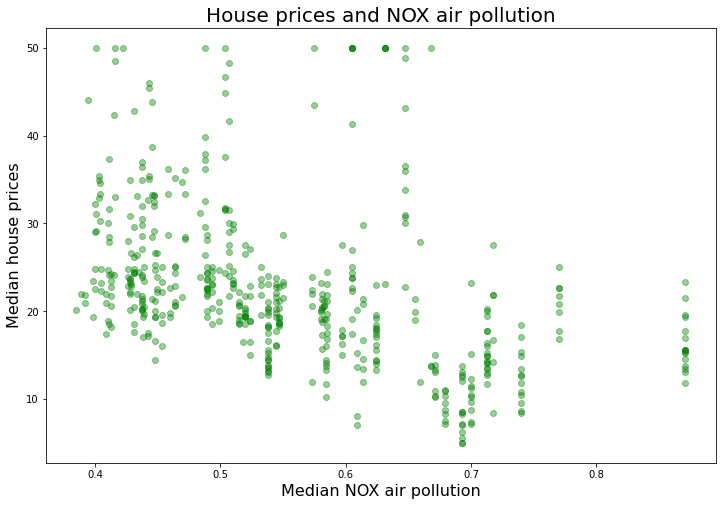

In [30]:
plt.figure(figsize = (12, 8))
plt.scatter(X['NOX'], Y, c = "g", alpha = 0.4)
plt.title("House prices and NOX air pollution", fontsize = 20)
plt.xlabel("Median NOX air pollution", fontsize = 16)
plt.ylabel("Median house prices", fontsize = 16)
plt.show

<p>It seems that it has a negative correlation between house prices and NOX air pollution but not as strong as I would have guessed and with a lot of variance </p>
<p> Let us investigate how criminality correlates with these house prices in Boston </p>

<function matplotlib.pyplot.show(close=None, block=None)>

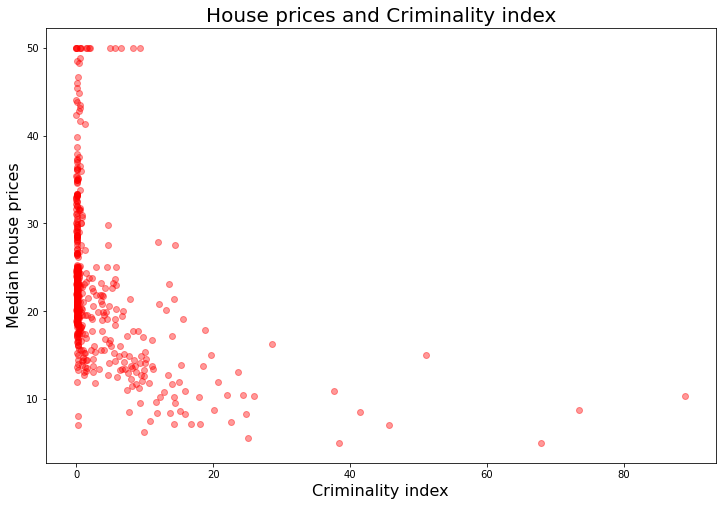

In [29]:
plt.figure(figsize = (12, 8))
plt.scatter(X['CRIM'], Y, c = "r", alpha = 0.4)
plt.title("House prices and Criminality index", fontsize = 20)
plt.xlabel("Criminality index", fontsize = 16)
plt.ylabel("Median house prices", fontsize = 16)
plt.show

<p> Negative correlation as well but with less variance </p> 
<p> Lastly, how about visualizing the association between house prices with distance from employment opportunities? </p>

<function matplotlib.pyplot.show(close=None, block=None)>

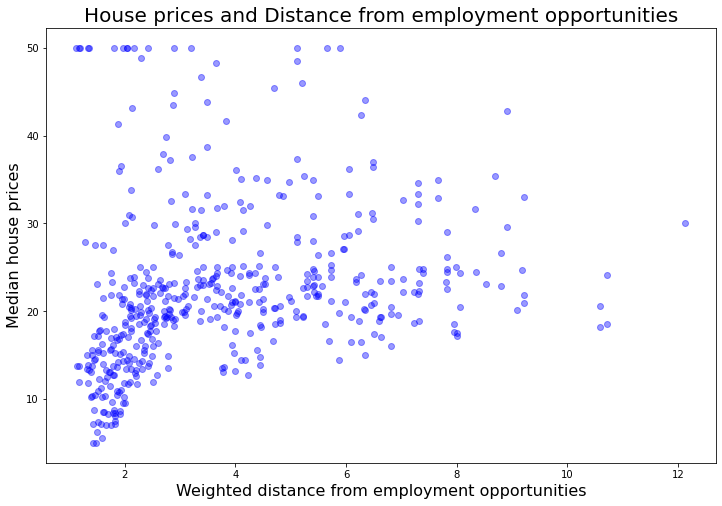

In [28]:
plt.figure(figsize = (12, 8))
plt.scatter(X['DIS'], Y, c = "b", alpha = 0.4)
plt.title("House prices and Distance from employment opportunities", fontsize = 20)
plt.xlabel("Weighted distance from employment opportunities", fontsize = 16)
plt.ylabel("Median house prices", fontsize = 16)
plt.show

### Model implementation

In [32]:
model = RandomForestRegressor()
model.fit(X, Y)
X['predicted_price'] = model.predict(X)

In [33]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,predicted_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,26.076
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.927
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.603
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,34.083
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,35.572


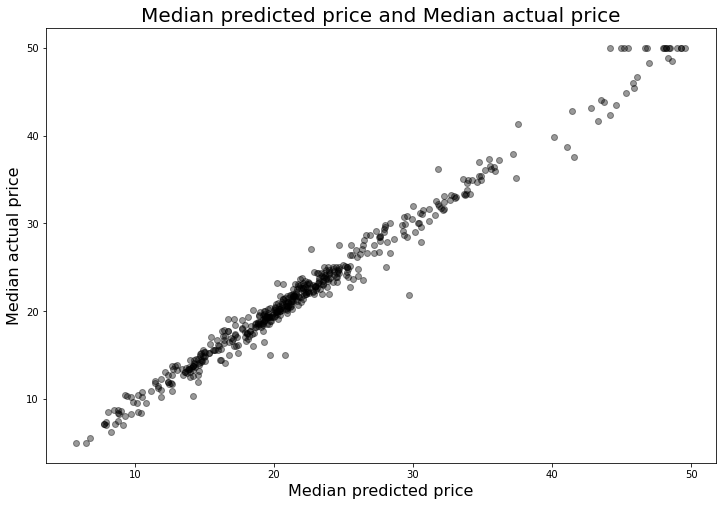

In [34]:
plt.figure(figsize = (12, 8))
plt.scatter(X['predicted_price'], Y, c="black", alpha = 0.4)
plt.title("Median predicted price and Median actual price", fontsize=20)
plt.xlabel("Median predicted price", fontsize=16)
plt.ylabel("Median actual price", fontsize=16)
plt.show()

<p> We reached the end of this exercise. Few naturally will arise: </p>
<p> (1): Where is the split between the training data and the forecast one? Maybe that is why the predicted price is really good on this implementation... </p>
<p> (2): Overfitting the model? Is this a thing here? </p> 
<p> (3): Lastly, why use RandomForestGenerator? </p>